# Machine learning-Diabetes Predictions

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exploratory data analysis 

In [2]:
dataset=pd.read_csv('diabetes.csv')
dataset.shape

(768, 9)

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In the merged dataset, we discovered a few exceptional zero values. For example, skin thickness and Body Mass Index (BMI) cannot be zero. The zero value has been replaced by its corresponding mean value. 

In [9]:
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [10]:
for col in zero_not_accepted:
    dataset[col]=dataset[col].replace(0,np.NAN)
    mean=int(dataset[col].mean(skipna=True))
    dataset[col]=dataset[col].replace(np.NaN,mean)

# Data Visualization 

Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding of our data.

# Check the distribution of variables
Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.

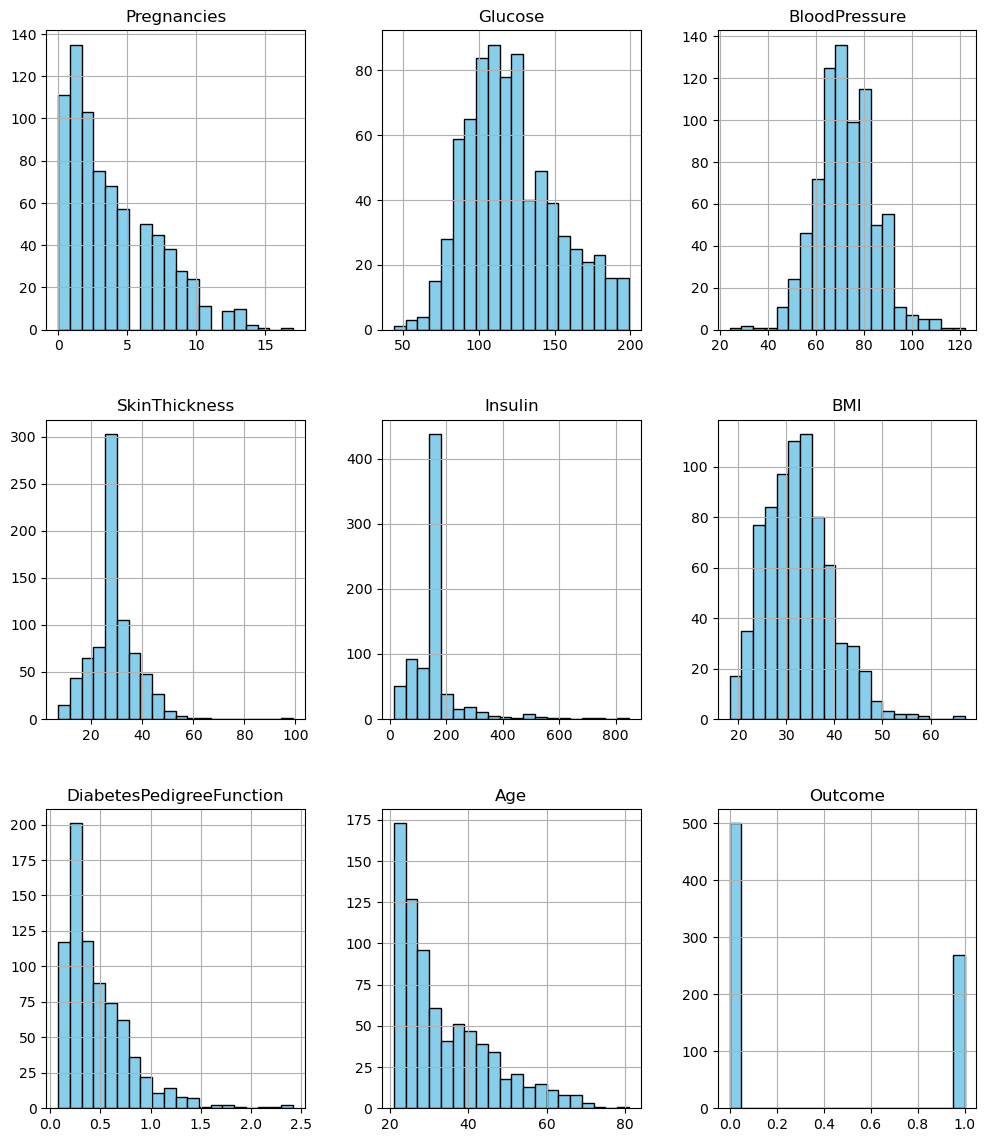

In [11]:
dataset.hist(bins=20, figsize=(12, 14), color='skyblue', edgecolor='black')
plt.show()

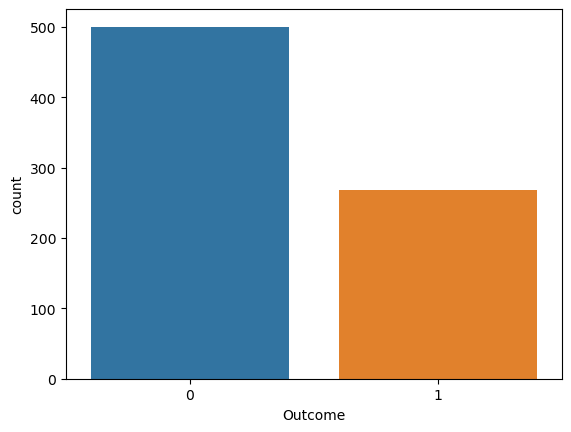

In [12]:
sns.countplot(x='Outcome', data=dataset)
plt.show()

# Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient between every pair of attributes. We can compute it using the df.corr() method as follows:

In [13]:
correlation = dataset.corr()

In [14]:
correlation['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492911
BMI                         0.312249
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.214278
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

We observe a moderately positive correlation, approximately 50%, between the 'outcome' variable and 'Glucose',and followed by 'BMI' with a portion of 31%. However, there is no significant correlation between 'outcome' and 'SkinThickness' or 'outcome' and 'BloodPressure.'

<AxesSubplot:title={'center':'Correlation of Attributes with outcome variable'}>

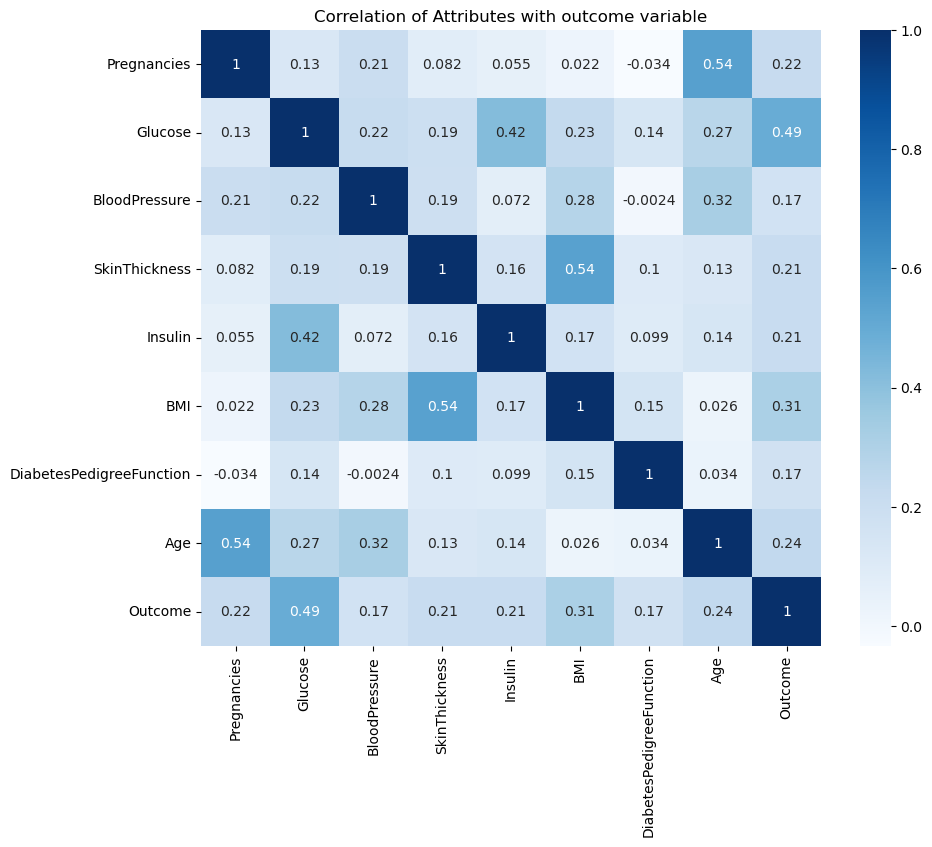

In [15]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with outcome variable')
sns.heatmap(correlation,annot=True,cmap='Blues')

# splitting data

In [16]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [17]:
#scaling data
from sklearn.preprocessing import StandardScaler
stan=StandardScaler()
X_train=stan.fit_transform(X_train)
X_test=stan.transform(X_test)

# KNeighborsClassifier
The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [18]:
#how choose K=n_neighbors:
import math
math.sqrt(len(y_test))

12.409673645990857

In [19]:
#define the model:init K-NN
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k,p=2,metric='euclidean')
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

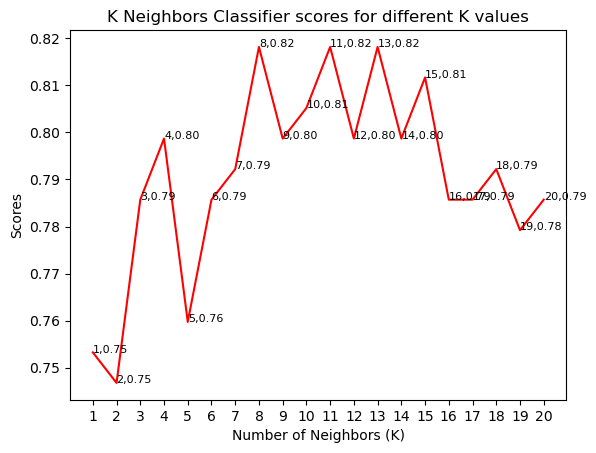

In [20]:
#plot knn_score
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1],f'{i},{knn_scores[i-1]:.2f}',fontsize=8)
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.82 for the 8,11,13 neighbors.

In [21]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 81.81818181818183% with 8 nieghbors.


# predicting

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8,p=2,metric='euclidean')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [23]:
#predict the test set results
y_pred=knn_classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Evaluating

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[98  9]
 [19 28]]


In [26]:
print('accuracy {:.2f}%'.format(100*accuracy_score(y_pred,y_test)))

accuracy 81.82%


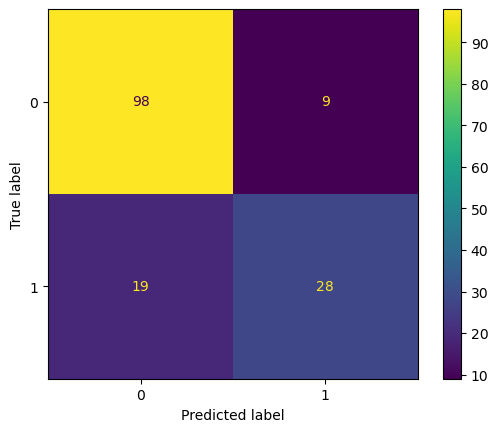

In [27]:
plot_confusion_matrix(knn_classifier,X_test,y_test)

# Conclusion